In [1]:
import collections
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.io as scio
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import classification_report

In [2]:
#Variables to play with settings
num_classes = 2
img_height, img_width = 32, 32
batch_size = 32
epoch_num = 30
verbose_num = 2

In [3]:
#Load Data
data_train = scio.loadmat("X_train.mat")
data_test = scio.loadmat("X_test.mat")
label_train = scio.loadmat("y_train.mat")
label_test = scio.loadmat("y_test.mat")

X_train = data_train['x_train']  ###
X_test = data_test['x_test']
y_train = label_train['y_train']  ###
y_test = label_test['y_test']

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# using Counter to find frequency of elements
frequency1 = collections.Counter(y_train[0])
# using Counter to find frequency of elements
frequency2 = collections.Counter(y_test[0])
print("FREQUENCY")
print(frequency1, frequency2)

FREQUENCY
Counter({1: 2326, 0: 1596}) Counter({1: 582, 0: 399})


In [4]:
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(y_train, num_classes).T
Y_test = convert_to_one_hot(y_test, num_classes).T

Y_train = tf.reshape(Y_train, [Y_train.shape[0], num_classes])
Y_test = tf.reshape(Y_test, [Y_test.shape[0], num_classes])

X_train = tf.image.resize(X_train, size=(img_height, img_width))
X_test = tf.image.resize(X_test, size=(img_height, img_width))

# Print the shape
tf.compat.v1.enable_eager_execution()
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3922, 32, 32, 3)
(981, 32, 32, 3)
(3922, 2)
(981, 2)


In [5]:
# # Model here
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [6]:
# Train your model
hist = model.fit(X_train, Y_train, verbose=verbose_num, epochs=epoch_num, validation_data=(X_test, Y_test), batch_size=batch_size)
print(hist.history.keys())

# Save the model
model.save("classifier_model.tf")


Epoch 1/30
123/123 - 8s - loss: 0.7764 - accuracy: 0.7269 - val_loss: 0.4951 - val_accuracy: 0.7992 - 8s/epoch - 64ms/step
Epoch 2/30
123/123 - 7s - loss: 0.4683 - accuracy: 0.8009 - val_loss: 0.4273 - val_accuracy: 0.8104 - 7s/epoch - 55ms/step
Epoch 3/30
123/123 - 6s - loss: 0.4501 - accuracy: 0.8078 - val_loss: 0.4356 - val_accuracy: 0.8257 - 6s/epoch - 50ms/step
Epoch 4/30
123/123 - 6s - loss: 0.4282 - accuracy: 0.8182 - val_loss: 0.4665 - val_accuracy: 0.8002 - 6s/epoch - 50ms/step
Epoch 5/30
123/123 - 6s - loss: 0.4155 - accuracy: 0.8345 - val_loss: 0.4593 - val_accuracy: 0.8053 - 6s/epoch - 51ms/step
Epoch 6/30
123/123 - 5s - loss: 0.3978 - accuracy: 0.8355 - val_loss: 0.4251 - val_accuracy: 0.8267 - 5s/epoch - 39ms/step
Epoch 7/30
123/123 - 6s - loss: 0.4021 - accuracy: 0.8322 - val_loss: 0.4258 - val_accuracy: 0.8216 - 6s/epoch - 50ms/step
Epoch 8/30
123/123 - 8s - loss: 0.3790 - accuracy: 0.8391 - val_loss: 0.3996 - val_accuracy: 0.8389 - 8s/epoch - 68ms/step
Epoch 9/30
123/1

INFO:tensorflow:Assets written to: classifier_model.tf\assets


INFO:tensorflow:Assets written to: classifier_model.tf\assets


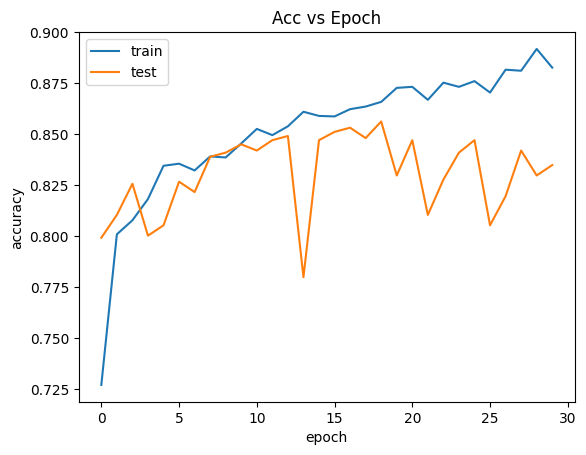

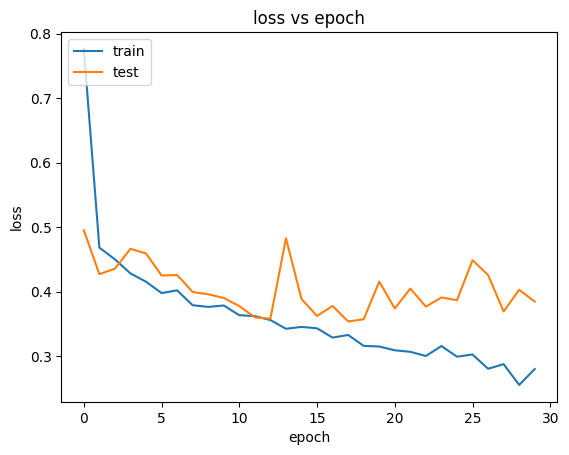

highest acc
0.8918918967247009
highest val acc
0.856269121170044


In [9]:
# Plot the Graph ----------------------

# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acc vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Print the highest accuracy and val_acuracy to terminal
print("highest acc")
print(max(hist.history['accuracy']))
print("highest val acc")
print(max(hist.history['val_accuracy']))

In [11]:
# Classifcation Report
predict = model.predict(X_test)
y_val2 = tf.keras.utils.to_categorical(Y_test, num_classes)

31/31 [==============================] - 0s 15ms/step


In [22]:
predict_o = np.argmax(predict, axis=1)
y_val2_temp =  np.argmax(y_val2, axis=1)
y_val2_o =  np.argmax(y_val2_temp, axis=1)
print(y_val2_o.shape)
print(predict_o.shape)
# print(predict_o)
# print(y_val2_o)
print(classification_report(y_val2_o, predict_o))

(981,)
(981,)
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       399
           1       0.82      0.93      0.87       582

    accuracy                           0.83       981
   macro avg       0.84      0.81      0.82       981
weighted avg       0.84      0.83      0.83       981

